In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

import zipfile

plt.style.use('ggplot')

zf = zipfile.ZipFile('hotel_bookings.csv.zip')
df = pd.read_csv(zf.open('hotel_bookings.csv'))

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
df = df.drop(['reservation_status_date','agent','company','reservation_status'], axis = 1)
df.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

asumiremos que los 4 vacios en niños son sin hijos

In [4]:
df['children'] = df['children'].fillna(0)

In [5]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [6]:
idx_county = df['country'].value_counts()[0:10].index
#idx_county = [idx_county.index, 'other']

df_1 = df[df['country'].isin(idx_county)]
df_2 = df[~df['country'].isin(idx_county)]
df_2['country'] = 'other'
df_2['country'].value_counts()

df2 = pd.concat([pd.DataFrame(df_1),pd.DataFrame(df_2)],ignore_index=True)

/tmp/ipykernel_53025/2063075749.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['country'] = 'other'


In [7]:
df2.shape, df.shape

((119390, 28), (119390, 28))

In [8]:
df2['country'].value_counts()

PRT      48590
other    18590
GBR      12129
FRA      10415
ESP       8568
DEU       7287
ITA       3766
IRL       3375
BEL       2342
BRA       2224
NLD       2104
Name: country, dtype: int64

In [9]:
df2['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [10]:
df2['hotel']=df2['hotel'].astype('category')
df2['arrival_date_month']=df2['arrival_date_month'].astype('category')
df2['reserved_room_type']=df2['reserved_room_type']
df2['assigned_room_type']=df2['assigned_room_type'].astype('category')
df2['deposit_type']=df2['deposit_type'].astype('category')
df2['customer_type']=df2['customer_type'].astype('category')
df2['meal']=df2['meal'].astype('category')
df2['market_segment']=df2['market_segment'].astype('category')
df2['distribution_channel']=df2['distribution_channel'].astype('category')
df2['is_repeated_guest']=df2['is_repeated_guest'].astype('category')
df2['country']=df2['country'].astype('category')

lhotel = LabelEncoder().fit(df2['hotel'])
larriv = LabelEncoder().fit(df2['arrival_date_month'])
lreserved = LabelEncoder().fit(df2['reserved_room_type'])
lassigned = LabelEncoder().fit(df2['assigned_room_type'])
ldeposit = LabelEncoder().fit(df2['deposit_type'])
lcustomerT = LabelEncoder().fit(df2['customer_type'])
lmeal = LabelEncoder().fit(df2['meal'])
lmarket = LabelEncoder().fit(df2['market_segment'])
ldistrChnl = LabelEncoder().fit(df2['distribution_channel'])
lRepeatedGst = LabelEncoder().fit(df2['is_repeated_guest'])
lcountry = LabelEncoder().fit(df2['country'])

df2['hotel']=lhotel.transform(df2['hotel'])
df2['arrival_date_month']=larriv.transform(df2['arrival_date_month'])
df2['reserved_room_type']=lreserved.transform(df2['reserved_room_type'])
df2['assigned_room_type']=lassigned.transform(df2['assigned_room_type'])
df2['deposit_type']=ldeposit.transform(df2['deposit_type'])
df2['customer_type']=lcustomerT.transform(df2['customer_type'])
df2['meal']=lmeal.transform(df2['meal'])
df2['market_segment']=lmarket.transform(df2['market_segment'])
df2['distribution_channel']=ldistrChnl.transform(df2['distribution_channel'])
df2['is_repeated_guest']=lRepeatedGst.transform(df2['is_repeated_guest'])
df2['country']=lcountry.transform(df2['country'])

In [11]:
X = df2.drop(['is_canceled'],axis = 1)
Y = df2['is_canceled']
X_train, X_test, y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state=123)

In [12]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((83573, 27), (35817, 27), (83573,), (35817,))

## Arboles de Decision

In [13]:
arbol = DecisionTreeClassifier(random_state=123).fit(X_train,y_train)
y_preds = arbol.predict(X_test)
yProbaTree = arbol.predict_proba(X_test)
fpr,tpr,thresholds = roc_curve(y_test,yProbaTree[:,1],pos_label=1)
auc(fpr,tpr)

0.8343310009407725

In [14]:
classification_report(y_preds,y_test), accuracy_score(y_preds,y_test)

('              precision    recall  f1-score   support\n\n           0       0.87      0.88      0.87     22214\n           1       0.80      0.78      0.79     13603\n\n    accuracy                           0.84     35817\n   macro avg       0.83      0.83      0.83     35817\nweighted avg       0.84      0.84      0.84     35817\n',
 0.8414440070357652)

## Adaboost

In [15]:
modeloAdab = AdaBoostClassifier(n_estimators=100,random_state=123).fit(X_train,y_train)
y_preds = modeloAdab.predict(X_test)

In [16]:
classification_report(y_preds,y_test), accuracy_score(y_preds,y_test)

('              precision    recall  f1-score   support\n\n           0       0.91      0.83      0.87     24922\n           1       0.68      0.82      0.74     10895\n\n    accuracy                           0.83     35817\n   macro avg       0.79      0.82      0.80     35817\nweighted avg       0.84      0.83      0.83     35817\n',
 0.8256414551749169)

In [17]:
y_proba = modeloAdab.predict_proba(X_test)

In [18]:
fpr,tpr,thresholds = roc_curve(y_test,y_proba[:,1],pos_label=1)
auc(fpr,tpr)

0.9054748610234085

### XGBoost

In [19]:
!pip install xgboost
import xgboost as xgb

Defaulting to user installation because normal site-packages is not writeable


In [20]:
XGClass = xgb.XGBClassifier(random_state=123).fit(X_train,y_train)
y_preds = XGClass.predict(X_test)

In [21]:
y_probaXGB = XGClass.predict_proba(X_test)
fpr,tpr,thresholds = roc_curve(y_test,y_probaXGB[:,1],pos_label=1)
auc(fpr,tpr)

0.9454479956833439

In [22]:
 accuracy_score(y_preds,y_test)

0.8712064103637938

In [23]:
XGClass.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, ...)>

In [26]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [48]:
plt.rcParams['figure.figsize'] = [200,200]
plt.rcParams['figure.dpi'] = 100

<Figure size 1500x1500 with 0 Axes>

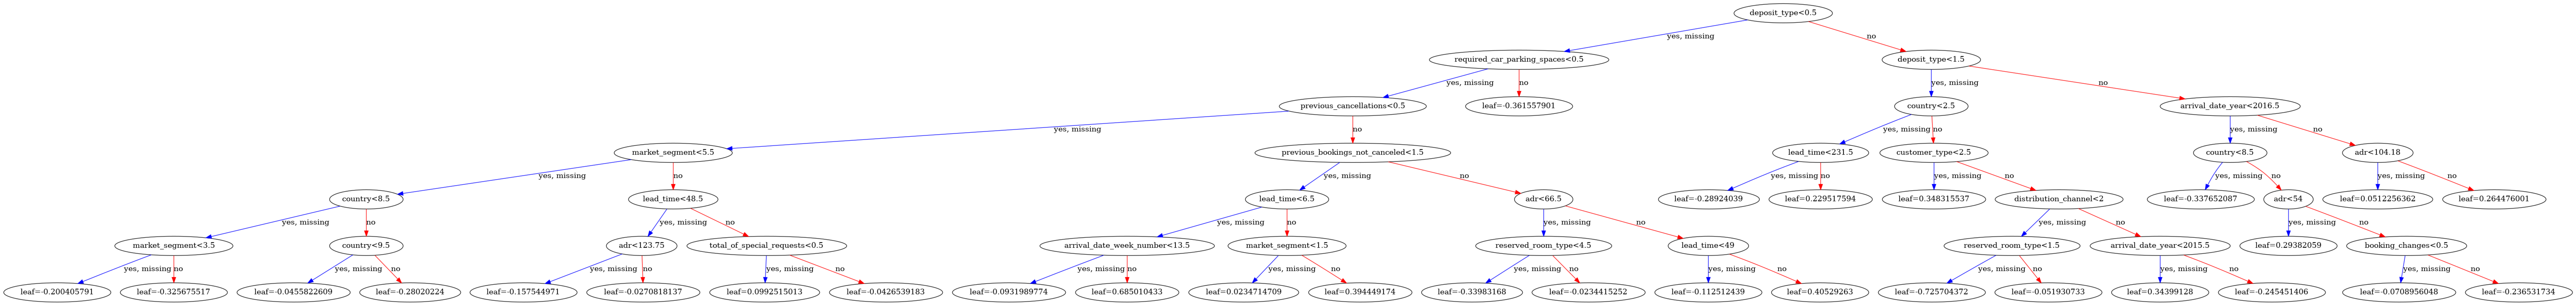

In [50]:
fig=plt.figure(figsize=(15, 15))
xgb.plot_tree(XGClass, num_trees=4); plt.show()